In [1]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq

# Load environment variables
os.environ["LANGSMITH_PROJECT"] = "AgenticAIworkspace"
load_dotenv()

groq_key = os.getenv("GROQ_API_KEY")

# Initialize the LLM
llm = ChatGroq(api_key=groq_key, model="llama-3.1-8b-instant")

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

# GraphState
class State(TypedDict):
    topic: str
    charactor: str
    settings: str
    premiss: str
    story_intro: str

In [3]:
def generate_charactor(state: State):
    """ Generate character descripton"""
    msg = llm.invoke(f"Create two character names and brief traits for a stroy about {state['topic']}")
    return {"charactor": msg.content}

def generate_setting(state: State):
    """ Generate settings descripton"""
    msg = llm.invoke(f"Descrived a vivid settings for a story about {state['topic']}")
    return {"settings": msg.content}

def generate_premiss(state: State):
    """ Generate premiss descripton"""
    msg = llm.invoke(f"Write a one-sentance plot premiss for a story about {state['topic']}")
    return {"premiss": msg.content}

def combine_elements(state: State):
    """ Combine characters , setting, premiss into an intro"""
    msg = llm.invoke(
        f"Write a sort story introduction using these element\n"
        f"character {state['charactor']}\n"
        f"settings {state['settings']}\n"
        f"premiss {state['premiss']}\n"
    )
    return {"story_intro": msg.content}

In [4]:
# create graph
graph = StateGraph(State)
graph.add_node("character", generate_charactor)
graph.add_node("settings", generate_setting)
graph.add_node("premiss", generate_premiss)
graph.add_node("combine", combine_elements)

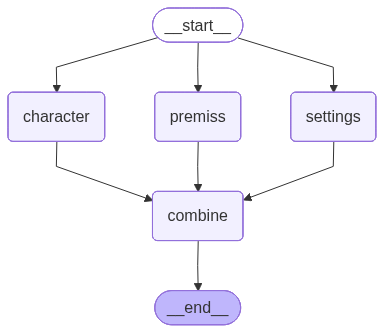

In [6]:
# add edge's
graph.add_edge(START, "character")
graph.add_edge(START, "settings")
graph.add_edge(START, "premiss")
graph.add_edge("character", "combine")
graph.add_edge("settings", "combine")
graph.add_edge("premiss", "combine")
graph.add_edge("combine", END)

# compile the builder
complied_graph = graph.compile()
graph_images = complied_graph.get_graph().draw_mermaid_png()

display(Image(graph_images))

In [7]:
state= {"topic": "Time Travel"}
result = complied_graph.invoke(state)
print(result['story_intro'])

In the heart of the Amazonian jungle, where the mist-shrouded rainforest whispered secrets to the wind, two individuals from disparate worlds were about to converge on a mission that would change the course of history forever. Ethan Thompson, a brilliant and introverted physicist, stood at the threshold of the Ancient Temple of Chronos, his eyes fixed on the glowing crystal at the center of the entrance, the Chronal Key. Beside him, Ava Morales, a free-spirited historian with a passion for exploring the ages, her infectious enthusiasm and charisma radiating like a beacon in the face of uncertainty.

As the sun dipped below the horizon, casting the temple in a warm, golden light, the air vibrated with an otherworldly energy. The intricate carvings and sculptures on the temple's facade seemed to stir, their ancient whispers weaving a spell of mystery and wonder. The scent of exotic blooms wafted through the air, entwining with the distant thrum of ancient drums, echoing through the trees